<a href="https://colab.research.google.com/github/ShindeVipul/Machine-Learning/blob/main/Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Context**

*   This dataset contains an airline passenger satisfaction survey.
*   What factors are highly correlated to a satisfied (or dissatisfied) passenger?
*   Can you predict passenger satisfaction?






## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Multiply CSV

In [ ]:
import glob

#Getting the csv files from the folder
path = '/content/drive/MyDrive/ML/Portfolio Project/DataSet'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)


# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)

## DataSet

In [ ]:
# Displayes all the features of the dataset in a single go
pd.set_option('display.max_columns',None)  

In [ ]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
129877,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
# Shape of the data set
print(df.shape)
print('The DataSet consists of ',df.shape[0],'ROWS and ',df.shape[1],'FEATURES')

(129880, 25)
The DataSet consists of  129880 ROWS and  25 FEATURES


In [ ]:
# using sample we can pickup random rows to check the content in the dataset
df.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
30164,4188,1868,Female,disloyal Customer,32,Business travel,Business,931,3,3,3,2,3,3,3,3,2,2,3,4,3,3,24,6.0,neutral or dissatisfied
3047,3047,88055,Male,Loyal Customer,50,Business travel,Business,3166,4,4,4,4,4,4,4,5,5,5,5,3,5,5,0,0.0,satisfied
118087,92111,85635,Female,Loyal Customer,70,Personal Travel,Eco,153,3,4,3,3,4,4,4,3,3,3,3,4,3,2,0,6.0,neutral or dissatisfied
115266,89290,64145,Female,disloyal Customer,47,Business travel,Business,989,4,4,4,2,4,4,4,4,4,5,5,4,4,4,0,0.0,satisfied
45852,19876,93899,Male,Loyal Customer,38,Personal Travel,Eco,588,1,5,1,4,1,1,3,1,3,5,4,4,5,1,10,9.0,neutral or dissatisfied


# **EXPLORATORY DATA ANALYSYS (EDA)**

In [ ]:
#Checking for the null values present in the dataset
df.isnull().sum() 

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [ ]:
# As the size of the data is big, dropping the missing values won't affect the dataset
df=df.dropna()

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
# droping unnecessary columns 'unnamed:0' and 'id' from the dataset
df.drop(['Unnamed: 0','id'], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
print('Dataset after dropping the null values and features consists of',df.shape[0],'ROWS and',df.shape[1],'FEATURES')

Dataset after dropping the null values and features consists of 129487 ROWS and 23 FEATURES


## Satisfaction result

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64

In [ ]:
# calculate the dissatisfaction rate
print(round((df[df['satisfaction']=='neutral or dissatisfied'].shape[0]/df.shape[0])*100,2),'% of the passenger were neutral or dissatisfied with the service provided by the airline')


56.55 % of the passenger were neutral or dissatisfied with the service provided by the airline


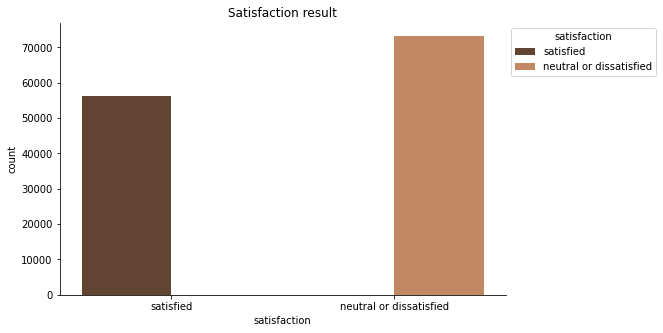

In [ ]:
#Graphically ploting the count of dissatisfied and satisfacted passengers

plt.figure(figsize=(8,5))
sns.countplot(data=df,x='satisfaction',hue='satisfaction',palette='copper')
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Satisfaction result')
plt.legend(bbox_to_anchor=(1,1),title='satisfaction')
plt.show()



```
# Here we see that satisfied passengers are 56428
# Here we see that dissatisfied or neutral passengers are 73452
# Neutral or dissatisfaction rate is 56.55%
```



## Count of Male and FEMALE  

In [ ]:
df['Gender'].value_counts()

Female    65703
Male      63784
Name: Gender, dtype: int64

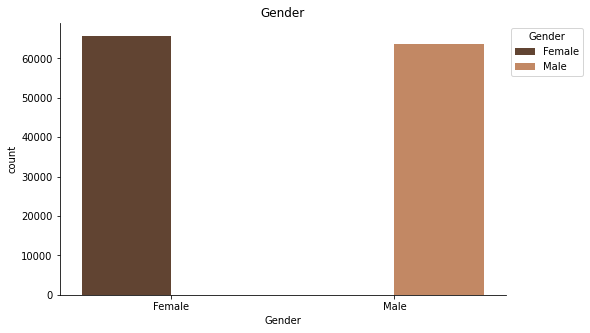

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Gender',hue='Gender',palette='copper')

sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Gender')
plt.legend(bbox_to_anchor=(1,1),title='Gender')
plt.show()



*   Here count of Females is 65899   
*   Here count of Males is 63981



##Passenger satisfaction by GENDER

In [ ]:
pd.DataFrame(df.groupby('Gender')['satisfaction'].value_counts())

satisfaction
Gender satisfaction                         
Female neutral or dissatisfied         37524
       satisfied                       28179
Male   neutral or dissatisfied         35701
       satisfied                       28083

In [ ]:
# Count of dissatisfied females
total_females=df[df['Gender']=='Female']
print('Total count of FEMALES is',total_females.shape[0])
dissatisfied_females=total_females[total_females['satisfaction']=='neutral or dissatisfied']
print('Neutral or dissatisfied females are: ',dissatisfied_females.shape[0])

# Count of satisfied females
satisfied_females=total_females[total_females['satisfaction']=='satisfied']
print('Satisfied females are: ',satisfied_females.shape[0])

# Count of dissatisfied male
total_males=df[df['Gender']=='Male']
print('Total count of MALES is',total_males.shape[0])
dissatisfied_males=total_males[total_males['satisfaction']=='neutral or dissatisfied']
print('Neutral or dissatisfied males are: ',dissatisfied_males.shape[0])

# Count of satisfied males
satisfied_males=total_males[total_males['satisfaction']=='satisfied']
print('Satisfied males are: ',satisfied_males.shape[0])


Total count of FEMALES is 65703
Neutral or dissatisfied females are:  37524
Satisfied females are:  28179
Total count of MALES is 63784
Neutral or dissatisfied males are:  35701
Satisfied males are:  28083


In [ ]:
# Calculate the dissatisfaction rate in females
dissatisfaction_rate_female=(dissatisfied_females.shape[0]/total_females.shape[0])*100
print('Dissatisfaction rate in females is: ',round(dissatisfaction_rate_female,2),'%')

# Calculate the dissatisfaction rate in males
dissatisfaction_rate_male=(dissatisfied_males.shape[0]/total_males.shape[0])*100
print('Dissatisfaction rate in males is: ',round(dissatisfaction_rate_male,2),'%')


Dissatisfaction rate in females is:  57.11 %
Dissatisfaction rate in males is:  55.97 %


In [ ]:
# create function 
#For calculating dissatisfaction rate for all the categorical columns

def satisfaction(target):

  df4=pd.crosstab(df[target], df.satisfaction)
  df4['Total']=df4['neutral or dissatisfied']+df4['satisfied']
  df4['Dissatisfaction Rate (%)']=round(df4['neutral or dissatisfied']*100/df4['Total'],2)
  
  return df4

In [ ]:
# df4=pd.crosstab(df.Gender, df.satisfaction)
# print(type(df4))
# pd.DataFrame(df4)
# df4
# df4['neutral or dissatisfied'].value_counts()
# df4['Total']=df4['neutral or dissatisfied']+df4['satisfied']
# df4['dis %']=round(df4['neutral or dissatisfied']*100/df4['Total'],2)
# df4

In [ ]:
# df1=df.groupby('Gender')
# df1['satisfaction'].value_counts()

# df2=pd.DataFrame()
# for i in df.satisfaction.value_counts().index:
#   df2[i]=df1.satisfaction.value_counts()
#df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


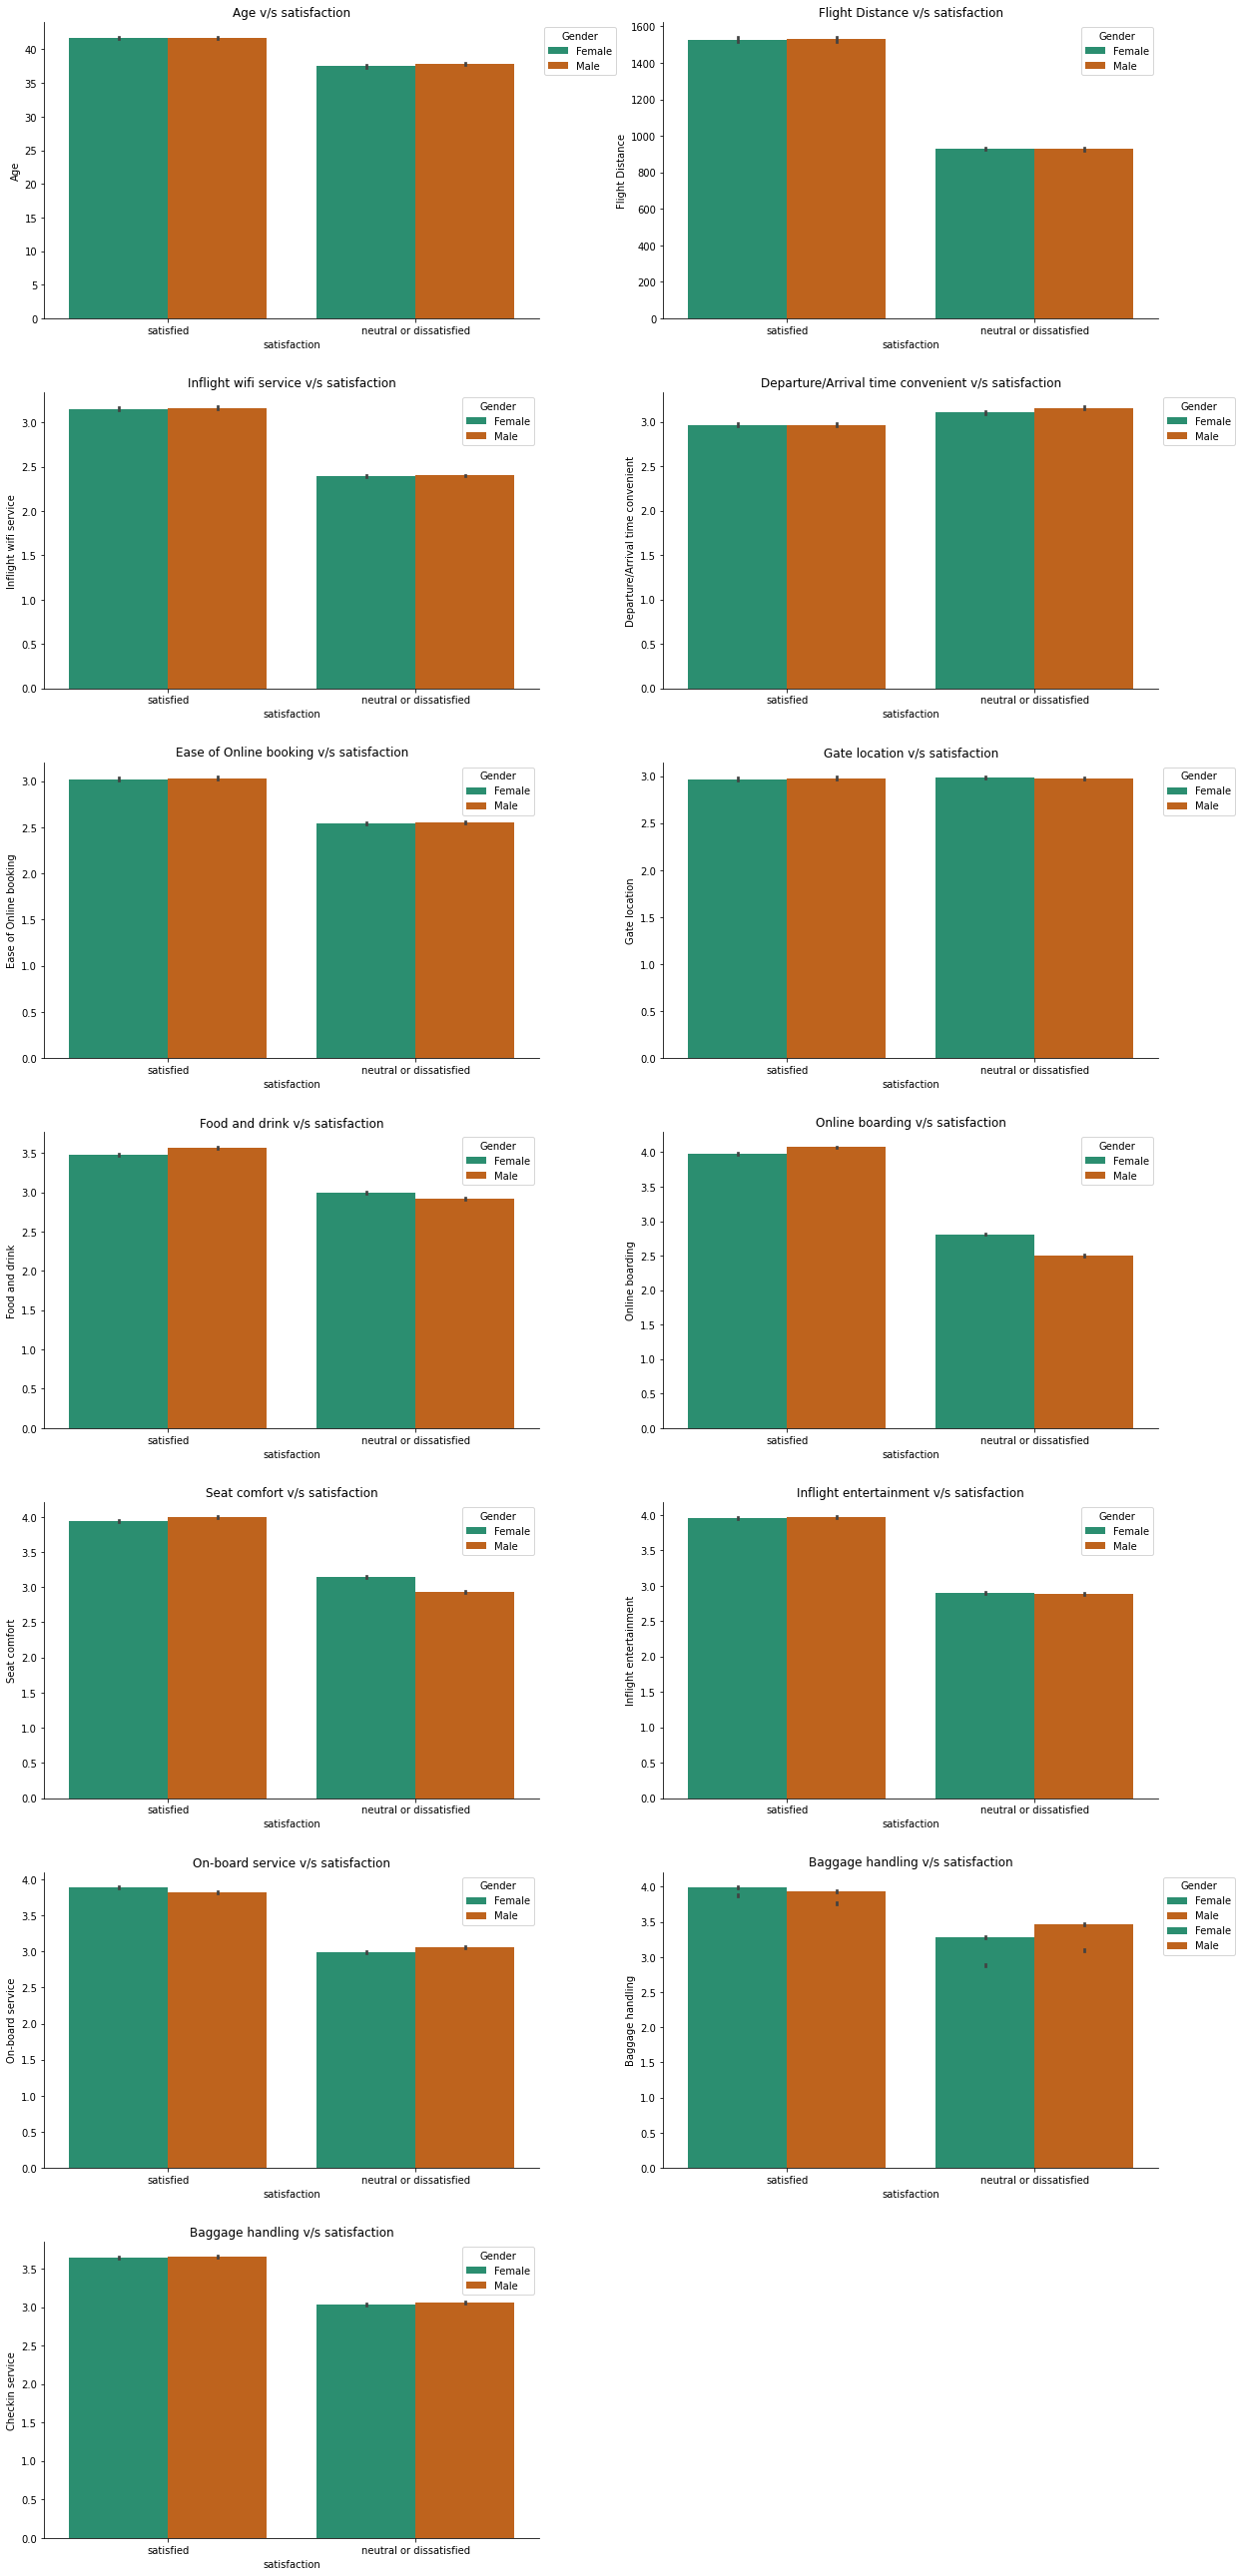

In [ ]:
#creating the graph
plt.figure(figsize=(20,60))


#Age v/s satisfaction
plt.subplot(9,2,1)
plt.subplots_adjust(hspace=0.25, wspace=0.25)
sns.barplot(x='satisfaction',y='Age',data=df,hue='Gender',palette='Dark2')
#format of the graph                 #for giving Title to the graph
plt.legend(bbox_to_anchor=(1,1), title = "Gender")                                  #For location of the legendBox and Title to it
sns.despine(top=True,right=True,left=False,bottom=False)                            #For margines of the graph
plt.title('Age v/s satisfaction')
                                  
#Flight Distance v/s satisfaction
plt.subplot(9,2,2)
sns.barplot(x='satisfaction',y='Flight Distance',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Flight Distance v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Inflight wifi service v/s satisfaction
plt.subplot(9,2,3)
sns.barplot(x='satisfaction',y='Inflight wifi service',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Inflight wifi service v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Departure/Arrival time convenient v/s satisfaction
plt.subplot(9,2,4)
sns.barplot(x='satisfaction',y='Departure/Arrival time convenient',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Departure/Arrival time convenient v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Ease of Online booking v/s satisfaction
plt.subplot(9,2,5)
sns.barplot(x='satisfaction',y='Ease of Online booking',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Ease of Online booking v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Gate location v/s satisfaction
plt.subplot(9,2,6)
sns.barplot(x='satisfaction',y='Gate location',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Gate location v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Food and drink v/s satisfaction
plt.subplot(9,2,7)
sns.barplot(x='satisfaction',y='Food and drink',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Food and drink v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Online boarding v/s satisfaction
plt.subplot(9,2,8)
sns.barplot(x='satisfaction',y='Online boarding',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Online boarding v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Seat comfort v/s satisfaction
plt.subplot(9,2,9)
sns.barplot(x='satisfaction',y='Seat comfort',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Seat comfort v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Inflight entertainment v/s satisfaction
plt.subplot(9,2,10)
sns.barplot(x='satisfaction',y='Inflight entertainment',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Inflight entertainment v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#On-board service v/s satisfaction
plt.subplot(9,2,11)
sns.barplot(x='satisfaction',y='On-board service',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('On-board service v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Leg room service v/s satisfaction
plt.subplot(9,2,12)
sns.barplot(x='satisfaction',y='Leg room service',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Leg room service v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Baggage handling v/s satisfaction
plt.subplot(9,2,12)
sns.barplot(x='satisfaction',y='Baggage handling',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Baggage handling v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

#Checkin service v/s satisfaction
plt.subplot(9,2,13)
sns.barplot(x='satisfaction',y='Checkin service',data=df,hue='Gender',palette='Dark2')
#format of the graph
sns.despine(top=True,right=True,left=False,bottom=False)
plt.title('Baggage handling v/s satisfaction')
plt.legend(bbox_to_anchor=(1,1), title = "Gender")

plt.show()

In [ ]:
#Checking for the columns in the datset
c=df.columns      
c

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
numerics = ['int64','float64']

#These are the numerical columns
df_con_col = df.select_dtypes(include = numerics).columns 

#These are the categorical columns
df_cat_col = df.select_dtypes(include = "object").columns        

In [ ]:
#Numerical columns 
df_con_col

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
#Categorical columns
df_cat_col

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

## **Visualization  based on  GENDER**

In [ ]:
# Creating a function to plot the subplots 

def detail_barplot(category):
    fig, axs = plt.subplots(9, 2, figsize=(10, 40))
    
    #fig.tight_layout(pad=3.0)
    for feature,ax in zip(df_con_col,axs.ravel()):
        ax = sns.barplot(ax=ax,x="satisfaction", y=feature, hue=category,palette= 'copper', data=df)


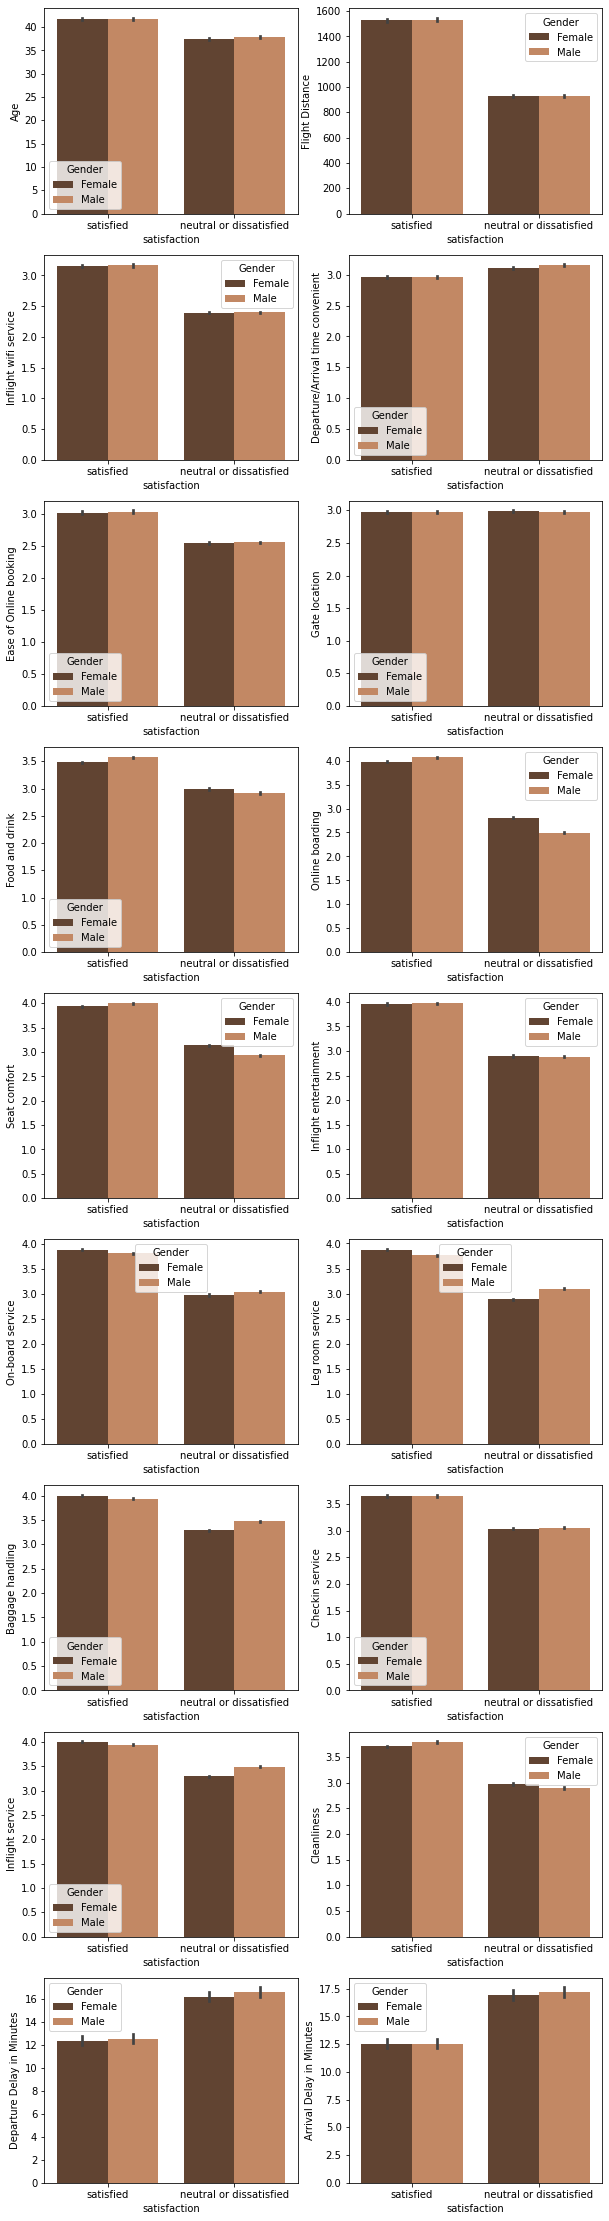

In [ ]:
#calling the function to plot graph of satisfaction V/S different features and hue as 'gender'
detail_barplot("Gender")

In [ ]:
# Tabular form for dissatatisfaction rate in GENDER
satisfaction('Gender')

satisfaction,neutral or dissatisfied,satisfied,Total,Dissatisfaction Rate (%)
Gender,,,,
Female,37524,28179,65703,57.11
Male,35701,28083,63784,55.97




   Based on results for GENDER

*   the long flight distance make them more likely to satisfy the trip.
*   if average in delay time is more than 12.5 minutes, the customer show dissatisfaction
*   there is no pattern between males and females.




## Passenger satisfaction by Customer Type

In [ ]:
pd.DataFrame(df.groupby('Customer Type')['satisfaction'].value_counts())

satisfaction
Customer Type     satisfaction                         
Loyal Customer    neutral or dissatisfied         55199
                  satisfied                       50574
disloyal Customer neutral or dissatisfied         18026
                  satisfied                        5688

## **Visualization based on CustomerType**

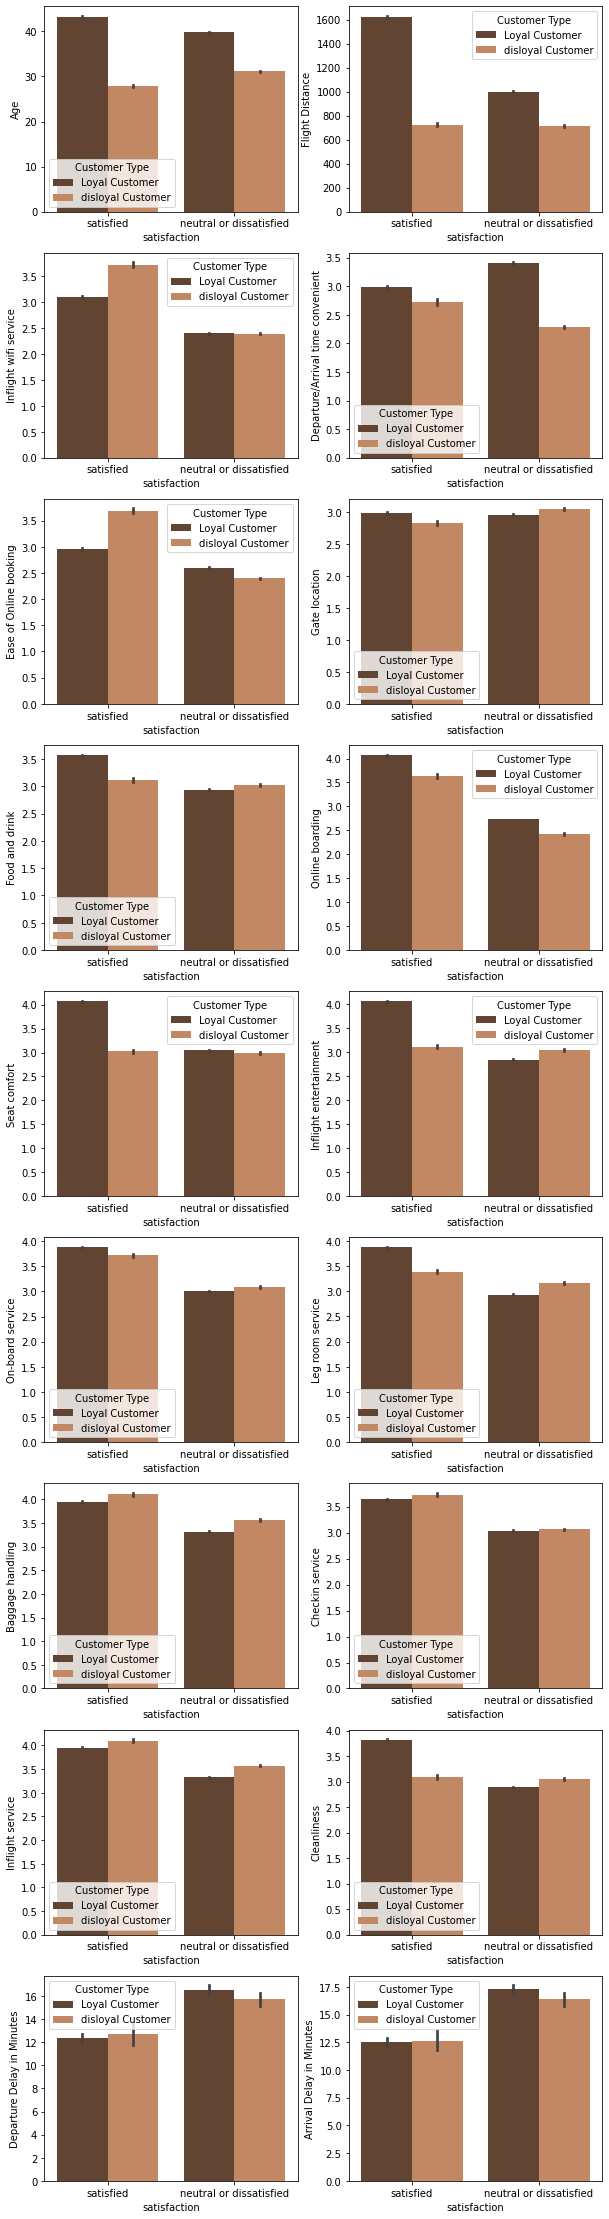

In [ ]:
detail_barplot("Customer Type")

In [ ]:
# Tabular form for dissatatisfaction rate in 'CUSTOMER TYPE'
satisfaction('Customer Type')

satisfaction,neutral or dissatisfied,satisfied,Total,Dissatisfaction Rate (%)
Customer Type,,,,
Loyal Customer,55199,50574,105773,52.19
disloyal Customer,18026,5688,23714,76.01


For loyal customers

*   Average age is 40.
*   Satisfaction on long flight distance, seat comfort, inflight entertainment, cleanliness, baggage handling, 

For Disloyal Customers
*   Average age is 30.
*   Satisfy on Inflight wifi service, ease of online booking, baggage handling


## Passenger satisfaction by TypeOfTravel

In [ ]:
pd.DataFrame(df.groupby('Type of Travel')['satisfaction'].value_counts())

satisfaction
Type of Travel  satisfaction                         
Business travel satisfied                       52207
                neutral or dissatisfied         37238
Personal Travel neutral or dissatisfied         35987
                satisfied                        4055

## **Visualization based on TypeOfTravel**

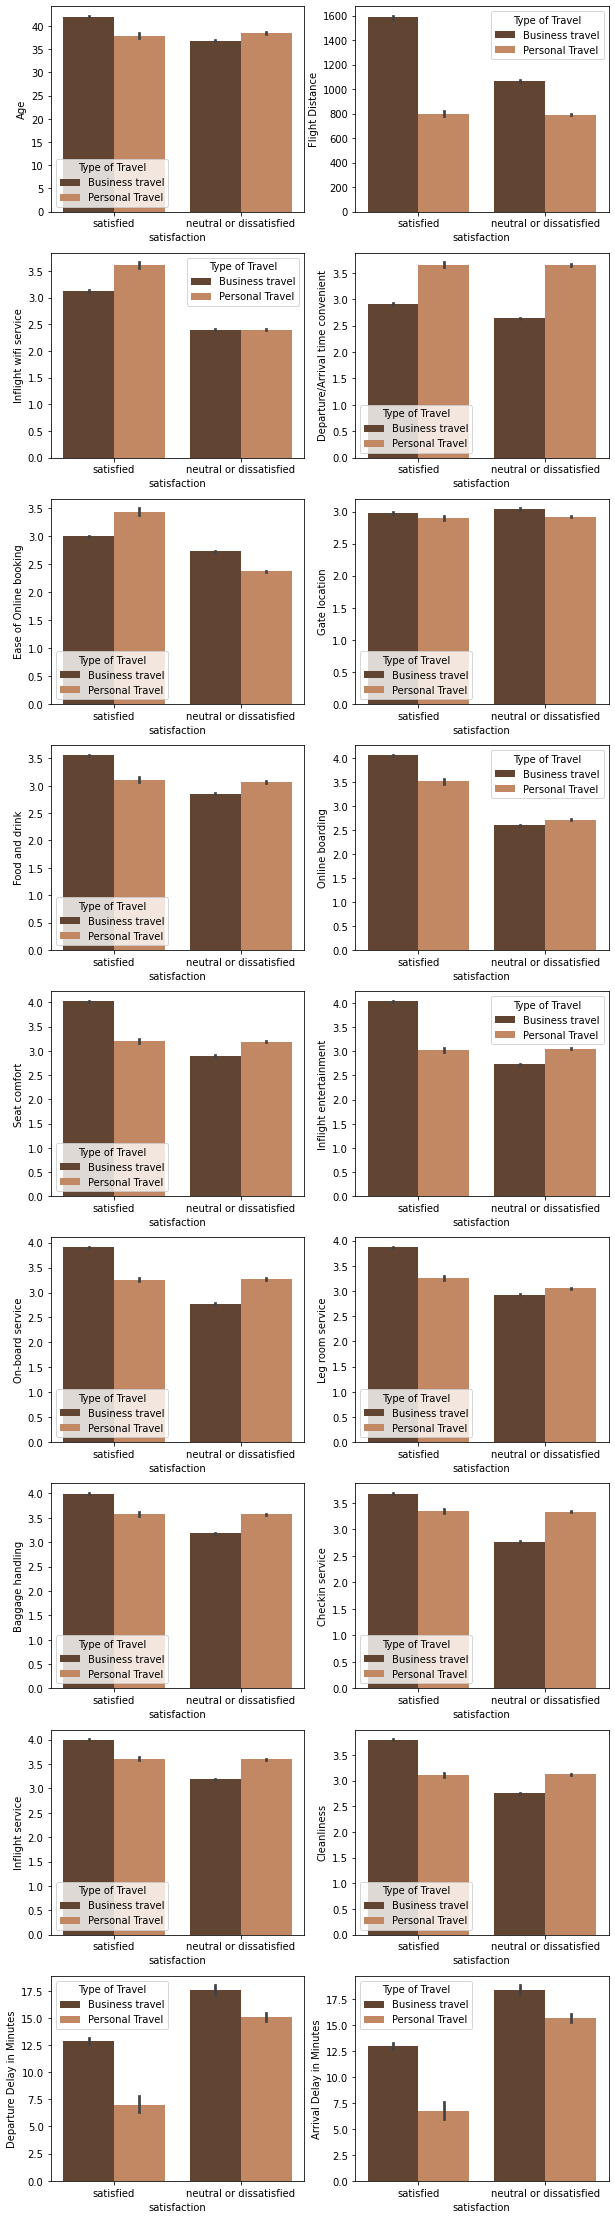

In [ ]:
detail_barplot("Type of Travel")

In [ ]:
# Tabular form for dissatatisfaction rate in 'TYPE OF TRAVEL'
satisfaction('Type of Travel')

satisfaction,neutral or dissatisfied,satisfied,Total,Dissatisfaction Rate (%)
Type of Travel,,,,
Business travel,37238,52207,89445,41.63
Personal Travel,35987,4055,40042,89.87


For Business travel

*   Satisfy on inflight service, baggage handling, on-boarding service, leg room service, inflight entertainment, seat comfort, online boarding

For Personal travel
*   Prefers to travel for short distance
*   Satisfy on inflight wifi service, ease on online booking



## Passenger satisfaction by Class

In [ ]:
pd.DataFrame(df.groupby('Class')['satisfaction'].value_counts())

satisfaction
Class    satisfaction                         
Business satisfied                       43050
         neutral or dissatisfied         18940
Eco      neutral or dissatisfied         47215
         satisfied                       10902
Eco Plus neutral or dissatisfied          7070
         satisfied                        2310

## **Visualization based on Class**

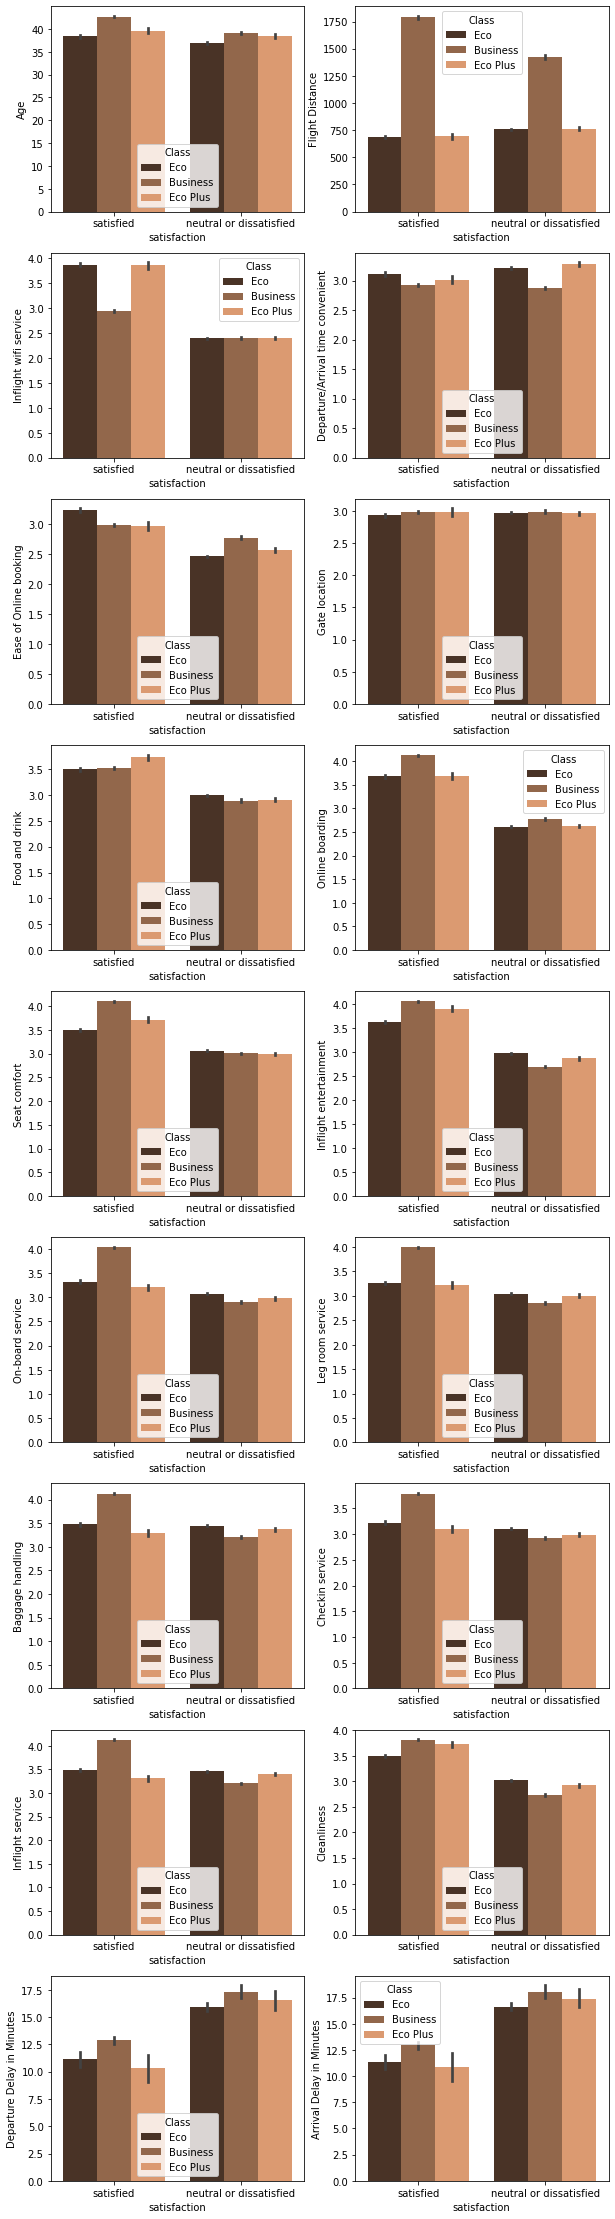

In [ ]:
detail_barplot('Class')

In [ ]:
# Tabular form for dissatatisfaction rate in 'CLASS'
satisfaction('Class')

satisfaction,neutral or dissatisfied,satisfied,Total,Dissatisfaction Rate (%)
Class,,,,
Business,18940,43050,61990,30.55
Eco,47215,10902,58117,81.24
Eco Plus,7070,2310,9380,75.37


For Business Class

*   Satisfies on long flight distance with online boarding, seat comfort, inflight entertainment, on board service, leg room service, baggage handling, inflight service and followed by cleanliness
*   Inflight WiFi service is slightly lower



In [ ]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## AGE

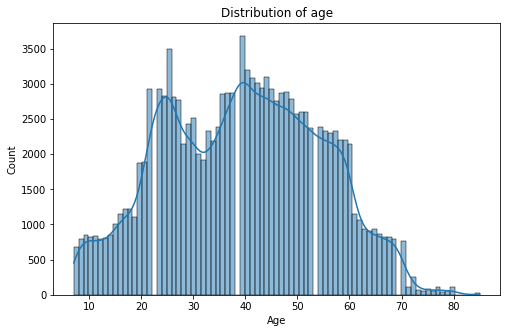

In [ ]:
# create graph
plt.figure(figsize = (8,5))
sns.histplot(x="Age",data=df, kde=True)

# format graph
plt.title("Distribution of age")
plt.show()

In [ ]:
df['Age'].mean()

39.42876118838185

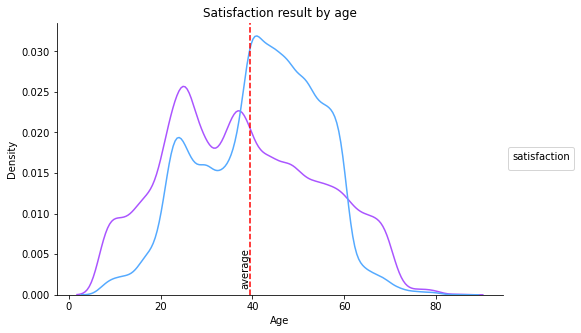

In [ ]:
# Create graph
plt.figure(figsize=(8,5))
sns.kdeplot(data=df,x='Age',hue='satisfaction',common_norm=False ,palette='cool')    #If True, scale each conditional density by the number of observations such that the total area under all densities sums to 1. Otherwise, normalize each density independently

#Format of the graph
plt.title('Satisfaction result by age')
sns.despine(top=True,right=True,left=False,bottom=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="satisfaction")    #loc legend location 
plt.axvline(df["Age"].mean(), ls="--", color="red")                             #Used to add a vertical line across the axis.
plt.text(df["Age"].mean()-2,0.001, 'average', rotation=90)                      #This allows formating the average line 
plt.show()

In [ ]:
def age_group(age):
  if age < 15:
    return 'Children'
  if (age >= 15) & (age < 25):
    return 'Early Working age'
  if (age >= 25) & (age < 54):
    return 'Prime Working age'
  if (age >= 54) & (age < 64):
    return 'Mature Working age'
  if age >= 64:
    return 'Senior'
  else:
    return 'No Age'

df['Age_Group']=df['Age'].apply(lambda age: age_group(age)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
satisfaction('Age_Group')

satisfaction,neutral or dissatisfied,satisfied,Total,Dissatisfaction Rate (%)
Age_Group,,,,
Children,5533,900,6433,86.01
Early Working age,12230,5925,18155,67.36
Mature Working age,9296,9764,19060,48.77
Prime Working age,40585,38383,78968,51.39
Senior,5581,1290,6871,81.23


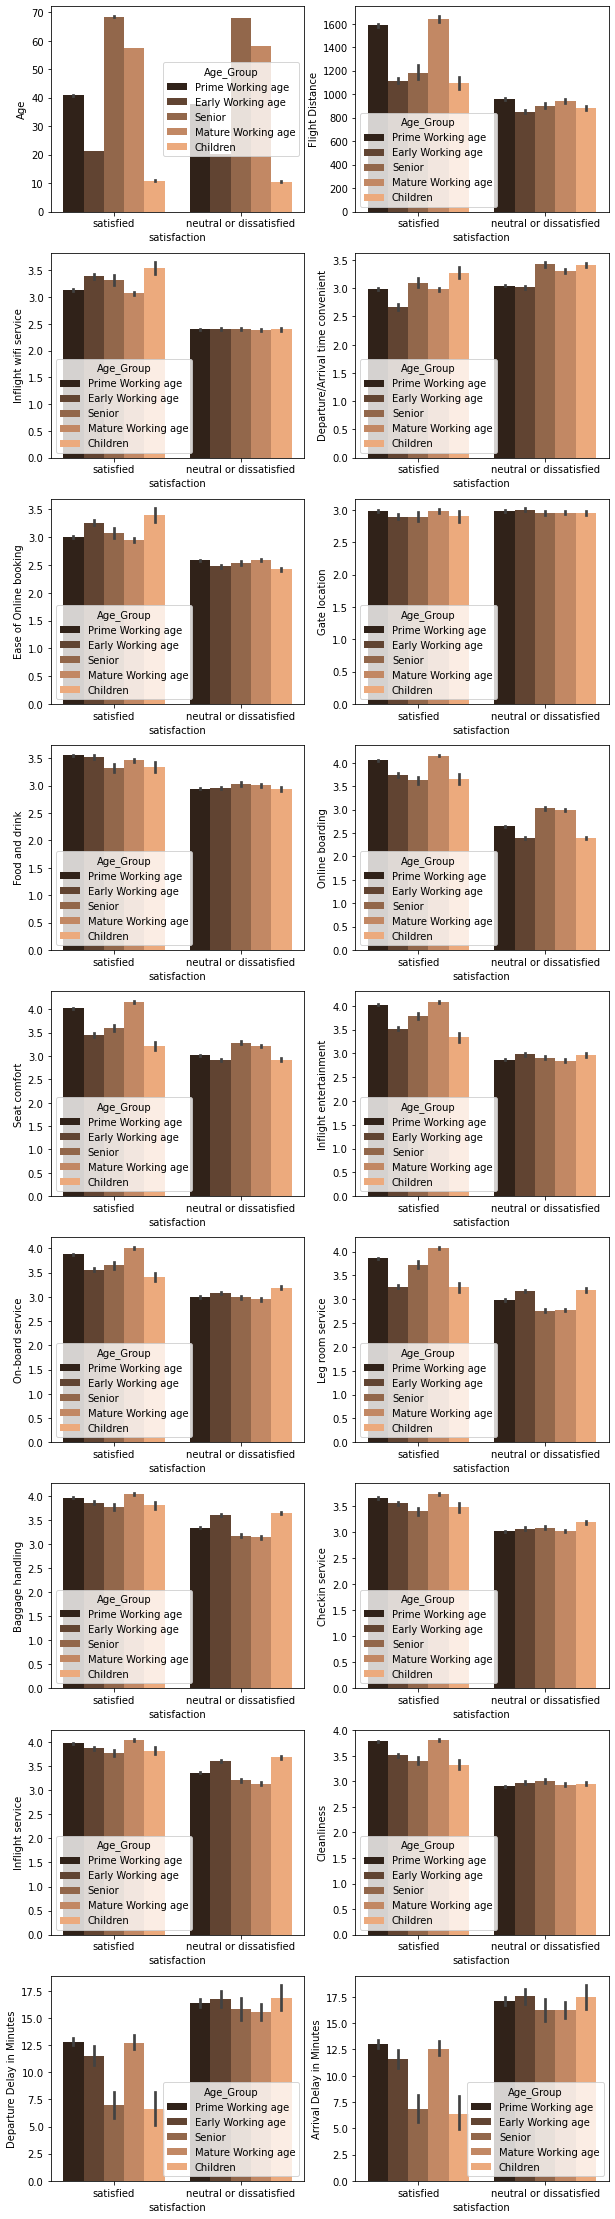

In [ ]:
detail_barplot('Age_Group')

In [ ]:
# Grouping by categorical features to find the number or satisfied and dissatisfied passengers

pd.DataFrame(df.groupby(['Gender','Customer Type','Type of Travel'])['satisfaction'].value_counts())

satisfaction
Gender Customer Type     Type of Travel  satisfaction                         
Female Loyal Customer    Business travel satisfied                       23215
                                         neutral or dissatisfied          9740
                         Personal Travel neutral or dissatisfied         17921
                                         satisfied                        2023
       disloyal Customer Business travel neutral or dissatisfied          9779
                                         satisfied                        2927
                         Personal Travel neutral or dissatisfied            84
                                         satisfied                          14
Male   Loyal Customer    Business travel satisfied                       23334
                                         neutral or dissatisfied          9641
                         Personal Travel neutral or dissatisfied         17897
                                         satisfied                        2002
       disloyal Customer Business travel neutral or dissatisfied          8078
                                         satisfied                        2731
                         Personal Travel neutral or dissatisfied            85
                                         satisfied                          16

## **To Conclude**

*   Good to see that there is not any relatively high neutral or dissatisfied scores in each category of flight experience.
*   Furthermore, the passengers are more likely acceptable for delay around 12.5 mins or below.
*   The airlines should focus more on the short distance flights.
*   Provide more inflight facilities seen above to reduce the dissatisfaction rate with respect to age and gender
*   This will also lead to more loyal customers and which will be benefit the airline



In [ ]:
df1=df.copy()

In [ ]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_Group
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,Prime Working age
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,Prime Working age
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,Early Working age
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,Prime Working age
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,Prime Working age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,Early Working age
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied,Prime Working age
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,Prime Working age
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,Early Working age


# **PRE-PROCESSING**

## Label Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
cat_col=df.select_dtypes(include='object')
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age_Group
0,Female,Loyal Customer,Business travel,Eco,satisfied,Prime Working age
1,Female,Loyal Customer,Business travel,Business,satisfied,Prime Working age
2,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,Early Working age
3,Male,Loyal Customer,Business travel,Business,satisfied,Prime Working age
4,Female,Loyal Customer,Business travel,Eco,satisfied,Prime Working age
...,...,...,...,...,...,...
129875,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,Early Working age
129876,Male,Loyal Customer,Business travel,Business,satisfied,Prime Working age
129877,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,Prime Working age
129878,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,Early Working age


In [ ]:
# Label Encoding the categorical columns

for i in cat_col.columns:
  df[i]=le.fit_transform(df[i])

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_Group
0,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1,3
1,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,3
2,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0,1
3,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,3
4,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0,1
129876,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1,3
129877,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,3
129878,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0,1


In [ ]:
df.drop(['Age'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_Group
0,0,0,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1,3
1,0,0,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,3
2,1,1,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0,1
3,1,0,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,3
4,0,0,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0,1
129876,1,0,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1,3
129877,1,1,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,3
129878,0,1,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0,1


In [ ]:
# shift column 'Age_Group' to second position
second_column = df.pop('Age_Group')
  
# insert column using insert(position,column_name,first_column) function
df.insert(1, 'Age_Group', second_column)  

In [ ]:
df

,Gender,Age_Group,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,3,0,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,0,3,0,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,1,1,1,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,1,3,0,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,0,3,0,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,1,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
129876,1,3,0,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
129877,1,3,1,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
129878,0,1,1,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


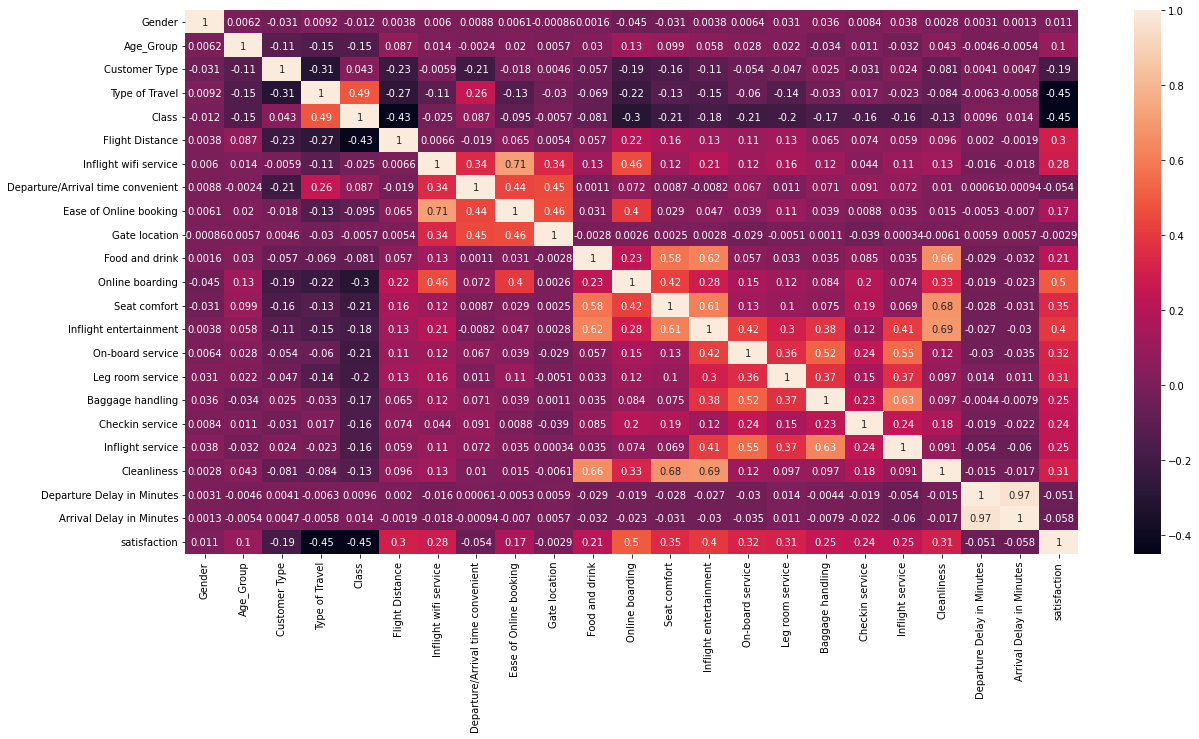

In [ ]:
# Checking for corelation using heat map

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Extracting Independent and dependent variables

In [ ]:
# Extracting Independent and dependent variables
X=df.drop('satisfaction',axis=1)
y=df['satisfaction']

## Splitting Data into Train & Test

In [ ]:
# Splitting the data set into training and test set
#importing Train test split
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print('The lenght of X trainig dataset is: ',len(X_train))
print('The lenght of X testing dataset is: ',len(X_test))

The lenght of X trainig dataset is:  90640
The lenght of X testing dataset is:  38847


## Feature Scaling

In [ ]:
#importing Standar Scalar
from sklearn.preprocessing import StandardScaler
stdsclr=StandardScaler()
X_train=stdsclr.fit_transform(X_train)
X_test=stdsclr.transform(X_test)

# **MODELLING**

In [ ]:
train_accuracy=[]
test_accuracy=[]

#del test_accuracy[5]
#del train_accuracy[5]

In [ ]:
# print(train_accuracy)
# print(test_accuracy)

## **LOGISTIC REGRESSION (LR)**

In [ ]:
#fitting logistic regression to training set
# import LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting the train results
y_pred_train=lr.predict(X_train)
#Predicting the test results
y_pred=lr.predict(X_test)

In [ ]:
#Test Accuracy of the  result
# Create the confusion matrix
#import confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#Confusion Matrix for LR
cm_lr=confusion_matrix(y_test,y_pred)
print('Confusion Matrix  \n',cm_lr)

#Classification Report for LR
cr_lr=classification_report(y_test, y_pred,target_names=['neutral or dissatisfaction', 'satisfaction'])
print('\nClassification Report \n',cr_lr)

#Training Accuracy 
train_acc_lr=accuracy_score(y_train, y_pred_train)
print('Train Accuracy ',round((train_acc_lr),2)*100,'%')
#Test Accuracy
test_acc_lr=accuracy_score(y_test, y_pred)
print('Test Accuracy ',round((test_acc_lr),2)*100,'%')

train_accuracy.append(round((train_acc_lr),2)*100)
test_accuracy.append(round((test_acc_lr),2)*100)

Confusion Matrix  
 [[19898  2066]
 [ 2850 14033]]

Classification Report 
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.87      0.91      0.89     21964
              satisfaction       0.87      0.83      0.85     16883

                  accuracy                           0.87     38847
                 macro avg       0.87      0.87      0.87     38847
              weighted avg       0.87      0.87      0.87     38847

Train Accuracy  88.0 %
Test Accuracy  87.0 %


## **SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
#fitting SUPPORT VECTOR MACHINE (SVM) to training set
# import SUPPORT VECTOR MACHINE (SVM) 
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
#Predicting the train results
y_pred_train=svm.predict(X_train)
#Predicting the test results
y_pred=svm.predict(X_test)

In [ ]:
#Test Accuracy of the  result
# Create the confusion matrix
#import confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#Confusion matrix for SVM
cm_svm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix  \n',cm_svm)

#Classification Report for SVM
cr_svm=classification_report(y_test, y_pred,target_names=['neutral or dissatisfaction', 'satisfaction'])
print('\nClassification Report \n',cr_svm)

#Training Accuracy 
train_acc_svm=accuracy_score(y_train, y_pred_train)
print('Train Accuracy ',round((train_acc_svm),2)*100,'%')
#Test accuracy
test_acc_svm=accuracy_score(y_test, y_pred)
print('Test Accuracy ',round((test_acc_svm),2)*100,'%')

train_accuracy.append(round((train_acc_svm),2)*100)
test_accuracy.append(round((test_acc_svm),2)*100)

Confusion Matrix  
 [[21299   665]
 [ 1124 15759]]

Classification Report 
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.97      0.96     21964
              satisfaction       0.96      0.93      0.95     16883

                  accuracy                           0.95     38847
                 macro avg       0.95      0.95      0.95     38847
              weighted avg       0.95      0.95      0.95     38847

Train Accuracy  96.0 %
Test Accuracy  95.0 %


## **RANDOM FOREST (RF)**

In [ ]:
#fitting RANDOM FOREST to training set
# import RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predicting the train results
y_pred_train=rf.predict(X_train)
#Predicting the test results
y_pred=rf.predict(X_test)

In [ ]:
#Test Accuracy of the  result
# Create the confusion matrix
#import confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#Confusion Matrix for RF
cm_rf=confusion_matrix(y_test,y_pred)
print('Confusion Matrix  \n',cm_rf)

#Classification Report for RF
cr_rf=classification_report(y_test, y_pred,target_names=['neutral or dissatisfaction', 'satisfaction'])
print('\nClassification Report \n',cr_rf)

#Training Accuracy 
train_acc_rf=accuracy_score(y_train, y_pred_train)
print('Train Accuracy ',round((train_acc_rf),2)*100,'%')
#Test Accuracy
test_acc_rf=accuracy_score(y_test, y_pred)
print('Test Accuracy ',round((test_acc_rf),2)*100,'%')

train_accuracy.append(round((train_acc_rf),2)*100)
test_accuracy.append(round((test_acc_rf),2)*100)

Confusion Matrix  
 [[21525   439]
 [ 1063 15820]]

Classification Report 
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     21964
              satisfaction       0.97      0.94      0.95     16883

                  accuracy                           0.96     38847
                 macro avg       0.96      0.96      0.96     38847
              weighted avg       0.96      0.96      0.96     38847

Train Accuracy  100.0 %
Test Accuracy  96.0 %


## **GRADIENT BOOSTING (GB)**

In [ ]:
#fitting GRADIENT BOOSTING to training set
# import GRADIENT BOOSTING 
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
#Predicting the train results
y_pred_train=gb.predict(X_train)
#Predicting the test results
y_pred=gb.predict(X_test)

In [ ]:
#Test Accuracy of the result
# Create the confusion matrix
#import confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#Confusion Matrix for GB
cm_gb=confusion_matrix(y_test,y_pred)
print('Confusion Matrix  \n',cm_gb)

#Classification Report for GB
cr_gb=classification_report(y_test, y_pred,target_names=['neutral or dissatisfaction', 'satisfaction'])
print('\nClassification Report \n',cr_gb)

#Training Accuracy 
train_acc_gb=accuracy_score(y_train, y_pred_train)
print('Train Accuracy ',round((train_acc_gb),2)*100,'%')
#Test Accuracy
test_acc_gb=accuracy_score(y_test, y_pred)
print('Test Accuracy ',round((test_acc_gb),2)*100,'%')

train_accuracy.append(round((train_acc_gb),2)*100)
test_accuracy.append(round((test_acc_gb),2)*100)

Confusion Matrix  
 [[21064   900]
 [ 1377 15506]]

Classification Report 
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     21964
              satisfaction       0.95      0.92      0.93     16883

                  accuracy                           0.94     38847
                 macro avg       0.94      0.94      0.94     38847
              weighted avg       0.94      0.94      0.94     38847

Train Accuracy  94.0 %
Test Accuracy  94.0 %


## **EXTREME GRADIENT BOOSTING (XGB)**

In [ ]:
#fitting EXTREME GRADIENT BOOSTING to training set
# import EXTREME GRADIENT BOOSTING 
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
#Predicting the train results
y_pred_train=xgb.predict(X_train)
#Predicting the test results
y_pred=xgb.predict(X_test)

In [ ]:
#Test Accuracy of the result
# Create the confusion matrix
#import confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#Confusion Matrix for XGB
cm_xgb=confusion_matrix(y_test,y_pred)
print('Confusion Matrix  \n',cm_xgb)

#Classification Report for XGB
cr_xgb=classification_report(y_test, y_pred,target_names=['neutral or dissatisfaction', 'satisfaction'])
print('\nClassification Report \n',cr_xgb)

#Training Accuracy 
train_acc_xgb=accuracy_score(y_train, y_pred_train)
print('Train Accuracy ',round((train_acc_xgb),2)*100,'%')
#Test Accuracy
test_acc_xgb=accuracy_score(y_test, y_pred)
print('Test Accuracy ',round((test_acc_xgb),2)*100,'%')

train_accuracy.append(round((train_acc_xgb),2)*100)
test_accuracy.append(round((test_acc_xgb),2)*100)

Confusion Matrix  
 [[21081   883]
 [ 1501 15382]]

Classification Report 
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.96      0.95     21964
              satisfaction       0.95      0.91      0.93     16883

                  accuracy                           0.94     38847
                 macro avg       0.94      0.94      0.94     38847
              weighted avg       0.94      0.94      0.94     38847

Train Accuracy  94.0 %
Test Accuracy  94.0 %


## **NAIVE BAYES (NB)**

In [ ]:
#fitting NAIVE BAYES to training set
# import NAIVE BAYES BOOSTING 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
#Predicting the train results
y_pred_train=nb.predict(X_train)
#Predicting the test results
y_pred=nb.predict(X_test)

In [ ]:
#Test Accuracy of the result
# Create the confusion matrix
#import confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#Confusion Matrix for NB
cm_nb=confusion_matrix(y_test,y_pred)
print('Confusion Matrix  \n',cm_nb)

#Classification Report for NB
cr_nb=classification_report(y_test, y_pred,target_names=['neutral or dissatisfaction', 'satisfaction'])
print('\nClassification Report \n',cr_nb)

#Training Accuracy 
train_acc_nb=accuracy_score(y_train, y_pred_train)
print('Train Accuracy ',round((train_acc_nb),2)*100,'%')
#Test Accuracy
test_acc_nb=accuracy_score(y_test, y_pred)
print('Test Accuracy ',round((test_acc_nb),2)*100,'%')

train_accuracy.append(round((train_acc_nb),2)*100)
test_accuracy.append(round((test_acc_nb),2)*100)

Confusion Matrix  
 [[19717  2247]
 [ 3098 13785]]

Classification Report 
                             precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.90      0.88     21964
              satisfaction       0.86      0.82      0.84     16883

                  accuracy                           0.86     38847
                 macro avg       0.86      0.86      0.86     38847
              weighted avg       0.86      0.86      0.86     38847

Train Accuracy  86.0 %
Test Accuracy  86.0 %


# **% MODEL GRAPH**

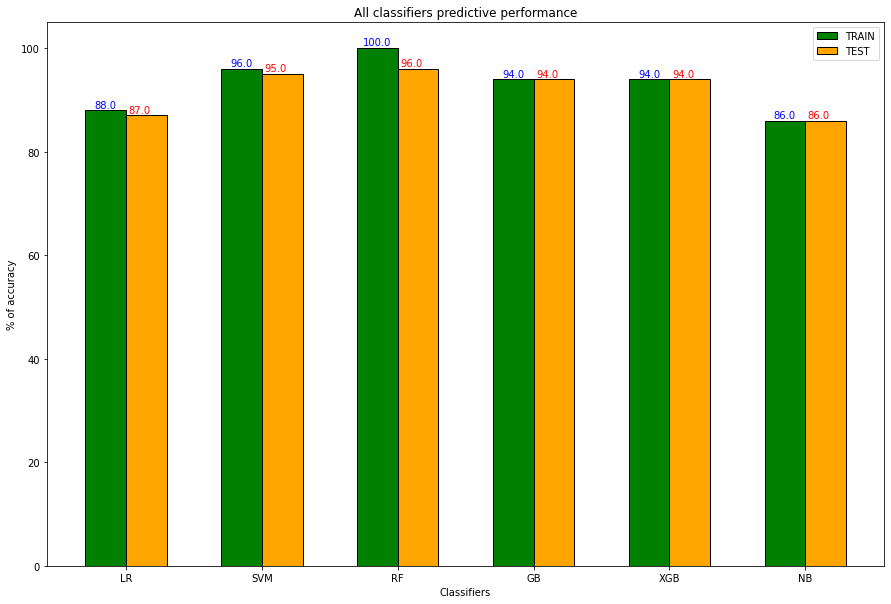

In [ ]:
# Creating graph that represents all the models accuracy(%)
plt.figure(figsize=(15,10))
m_list=['LR','SVM','RF','GB','XGB','NB']
n=6
r=np.arange(n)
width=0.3


plt.bar(r, train_accuracy, width=width, color='green', label='TRAIN', edgecolor='black')
for i in range(len(train_accuracy)):
  plt.text(i, train_accuracy[i]+0.5, train_accuracy[i], ha='center', color='blue')              #ha='center'--> gets the top text at the center of the bar

plt.bar(r + width, test_accuracy, width=width, color='orange', label='TEST', edgecolor='black')
for i in range(len(test_accuracy)):
  plt.text(i+0.25, test_accuracy[i]+0.5, test_accuracy[i], ha='center', color='red')             

plt.xlabel("Classifiers")
plt.ylabel("% of accuracy")
plt.title("All classifiers predictive performance")

plt.xticks(r + width/2,m_list)
plt.legend()
  
plt.show()



*   The highest test accuracy can achieve 96%.

*   Overall, the tree-based classifier out perform than the others.

*   It is worth to check which factors affect the most from them.




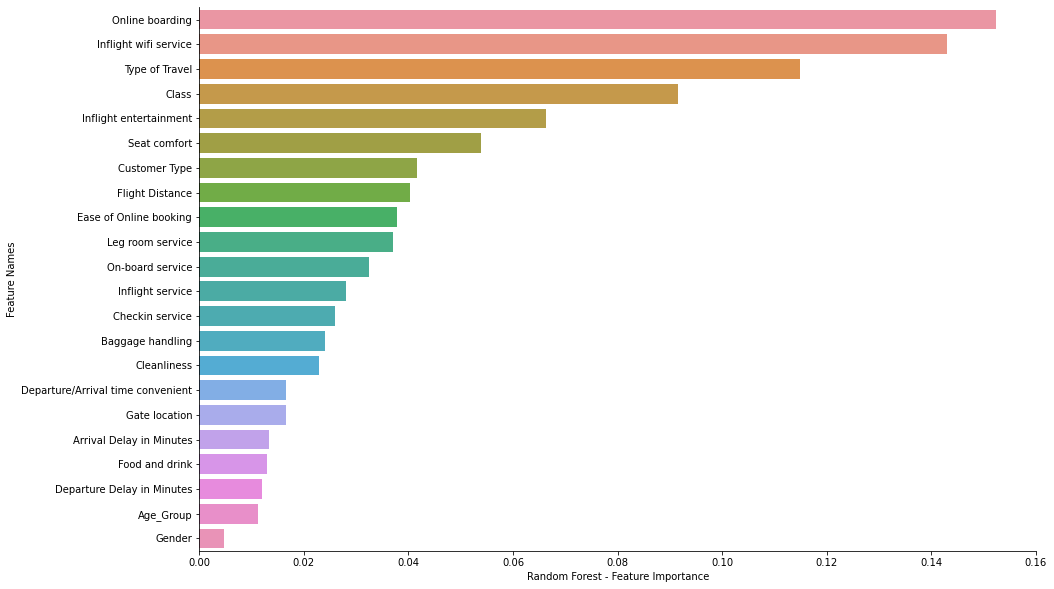

In [ ]:
#checking for the features that our model has given importance to
feature_importance=rf.feature_importances_
column_names=df.iloc[:,:-1].columns
rf_fi={'feature_names':column_names,'feature_importance':feature_importance}

#creating a dataframe
df_rf=pd.DataFrame(rf_fi)
df_rf.sort_values(by='feature_importance',ascending=False,inplace=True)

#Ploting the graph 'feature names' V/S 'feature_importance'
plt.figure(figsize=(15,10))
sns.barplot(x=df_rf['feature_importance'], y=df_rf['feature_names'])
sns.despine(top=True,right=True,left=False,bottom=False)                        #removing the border lines

plt.xlabel('Random Forest - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

In [ ]:
df_rf

,feature_names,feature_importance
11,Online boarding,0.152438
6,Inflight wifi service,0.143058
3,Type of Travel,0.114964
4,Class,0.091590
13,Inflight entertainment,0.066385
12,Seat comfort,0.053822
2,Customer Type,0.041574
5,Flight Distance,0.040370
8,Ease of Online booking,0.037740
15,Leg room service,0.037098
